<a href="https://colab.research.google.com/github/baitiarecorvalan/MAT281-Entregables/blob/main/docs/codes/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°07

**Objetivo**: Aplicar técnicas básicas de **Machine Learning** (tanto regresión como clasificación), desde la preparación de datos hasta el entrenamiento y evaluación de modelos.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.



## Regresión


<img src="https://cdn-icons-png.flaticon.com/512/2400/2400362.png" width = "300" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #(agregar R^2)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]
    df_result['R^2'] = [round(r2_score(y_true, y_pred), 4)]  #(agregar R^2)

    return df_result

In [91]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# **Definicion del problema**

Se busca poder predecir el valor medio de las propiedades de California (Variable dependiente), en base a las caracteristicas geograficas, sociales, economicas que se encuentran en el conjunto entregado (Variables independientes).

# **Estadistica descriptiva**

In [92]:
housing.describe(include='all')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# **Visualización descriptiva**

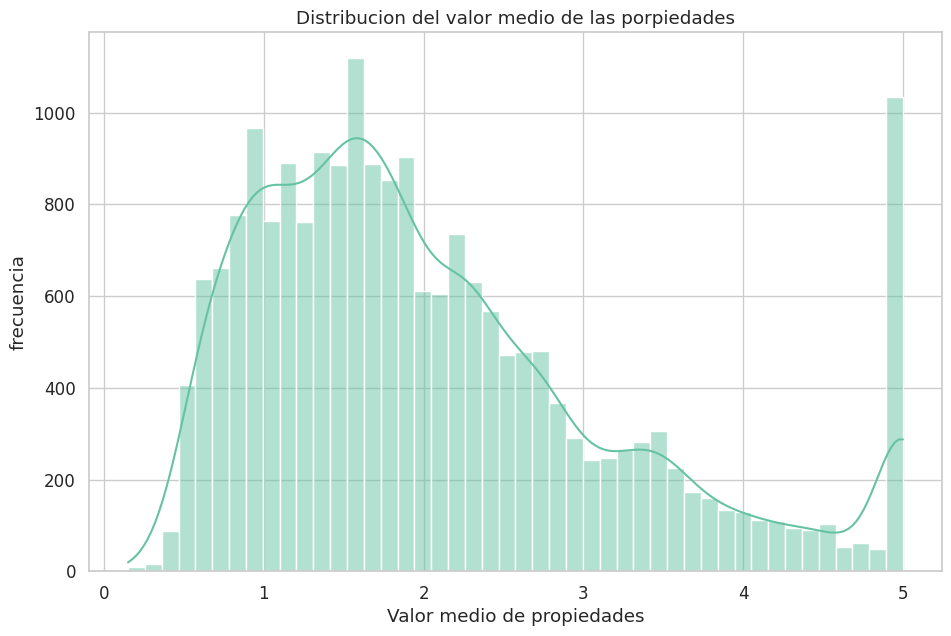

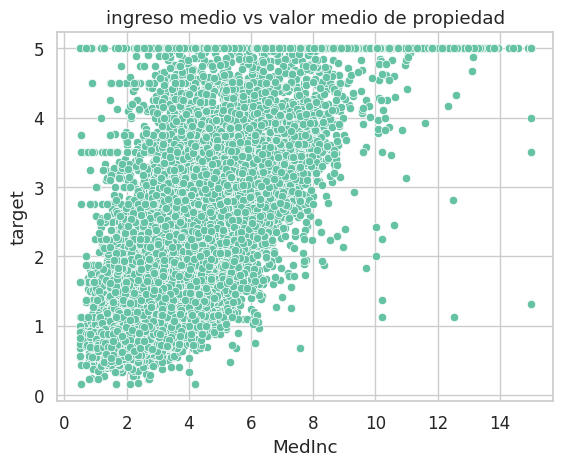

In [93]:
plt.figure(figsize=(11, 7))
sns.histplot(housing["target"], kde=True)
plt.title("Distribucion del valor medio de las porpiedades")
plt.xlabel("Valor medio de propiedades")
plt.ylabel("frecuencia")
plt.show()

sns.scatterplot(x="MedInc", y="target", data=housing)#ingreso vs valor
plt.title("ingreso medio vs valor medio de propiedad")
plt.show()

# **Preprocesamiento**

In [94]:
#Columnas
print(housing.columns.tolist())
#nulos
housing.isnull().sum()


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'target']


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [95]:
import time
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

housing["categoria_ingreso"] = pd.cut(
    housing['MedInc'], #creamos una nueva columna a partir de los ingresos
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf], #y dividmos por rango para evitar sesgos
    labels=[1, 2, 3, 4, 5] #con estas categorias
)

split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) #hacermos una division del 20% de los datos, para prueba
for train_idx, test_idx in split.split(housing, housing["categoria_ingreso"]): #luego se divide los datos de acuerdo a las proporciones de la categoria creada
    train_set=housing.iloc[train_idx].drop(columns=["categoria_ingreso"])
    test_set =housing.iloc[test_idx].drop(columns=["categoria_ingreso"])

#eliminar outliers
columnas_problema=["AveRooms", "AveBedrms", "Population", "AveOccup"]
for c in columnas_problema:
    q99=train_set[c].quantile(0.99) #percentil 99 para cada columna
    train_set[c]= np.where(train_set[c] > q99, q99, train_set[c])
    test_set[c]= np.where(test_set[c] > q99, q99, test_set[c]) #recorta los datos que puedan estar fuera del margen

for c in columnas_problema:
    train_set[c]= np.log1p(train_set[c])#suavizar las distribuciones mas sesgadas
    test_set[c]= np.log1p(test_set[c])

#columnas finales
columnas_n=[
    "MedInc", "HouseAge", "AveRooms", "AveBedrms",
    "Population", "AveOccup", "Latitude", "Longitude"
]
X_train=train_set[columnas_n].copy() #variable indep enteno
y_train=train_set["target"].copy()

X_test=test_set[columnas_n].copy()#variable indep testeo
y_test=test_set["target"].copy()

#escalamiento: Normaliza magnitudes para modelos sensibles a escala
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)#aplicamos la transformacion para que los valores queden con media 0 y dsv 1
X_test_scaled=scaler.transform(X_test)#normalizar el conjunto de prueba


# **Seleccion del modelo y metricas de modelos**

Se utilizaran los modelos Linear Regression con variales escaladas, ya que de esta forma es posible evaluar cuanto mejora el error al introducir modelos más flexibles. Decision Tree Regressor y Random Forest Regressor para evaluar no linealidad. Gradient Boosting Regressor tambien con variables escaladas para comparar potencial de mejor rendimiento aunque a mayor costo de entrenamiento.

In [96]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#utilizamos una funcion que pueda agilizar la revision de cada modelo
def evaluar_modelo(nombre_modelo, modelo, X_train, X_test, y_train, y_test):

    t_0=time.perf_counter() #tomamos el tiempo de comienzo
    modelo.fit(X_train, y_train) #ajustar con las variables de entreno
    tiempo_ajuste=time.perf_counter() - t_0 #calcular el tiempo que demora en ajustarse
    t_1=time.perf_counter() #otro tiempo
    y_pred=modelo.predict(X_test)#predecir valores
    tiempo_pred=time.perf_counter() - t_1 #calculamos el tiempo que demora en predecir

    metricas_df=regression_metrics(pd.DataFrame({'y': y_test, 'yhat': y_pred})) #se le dan los datos a la funcion de las metricas del modelo que esta siendo evaluado
    metricas_df["modelo"]= nombre_modelo #para cada modelo
    metricas_df["tiempo de ajuste"]=round(tiempo_ajuste, 4) #le sumamos el tiempo de ajuste
    metricas_df["tiempo de prediccion"]=round(tiempo_pred, 4) #y el tiempo de prediccion

    return metricas_df #se devuelve el desempeño de cada modelo

modelos = [
    ('LinearRegression (escalado)', LinearRegression(), True),
    ('DecisionTree', DecisionTreeRegressor(random_state=42), False),
    ('RandomForest', RandomForestRegressor(random_state=42, n_estimators=300, max_depth=None, n_jobs=-1), False),
    ('GradientBoosting (escalado)', GradientBoostingRegressor(random_state=42), True),
] #lista de moldelos a usar (los que tienen "true" se refiere a que si se utilizaran datos escalados)

resultados_mod=[]
for nombre_modelo, modelo, con_scaling in modelos: #por cada modelo dentro de la lista se evalua si utiliza datos escalados o no
    if con_scaling:#si son escalados se utilizan X_train_scaled y X_test_scaled
        resultado=evaluar_modelo(nombre_modelo, modelo, X_train_scaled, X_test_scaled, y_train, y_test)
    else: #si no, se utilizan los originales
        resultado= evaluar_modelo(nombre_modelo, modelo, X_train, X_test, y_train, y_test)
    resultados_mod.append(resultado)

results_df=pd.concat(resultados_mod).set_index('modelo').sort_values('rmse') #concatenamos cada resultado
display(results_df)


,mae,mse,rmse,mape,smape,R^2,tiempo de ajuste,tiempo de prediccion
modelo,,,,,,,,
RandomForest,0.3239,0.2404,0.4903,18.7764,0.3162,0.8155,30.2536,0.2498
GradientBoosting (escalado),0.3604,0.2633,0.5132,21.1317,0.3489,0.7979,4.1584,0.0075
LinearRegression (escalado),0.4817,0.4266,0.6531,29.8276,0.4595,0.6727,0.0092,0.0006
DecisionTree,0.4781,0.5393,0.7344,26.6296,0.4206,0.5862,0.2340,0.0031


nos guiaremos de acuerdo al modelo GradientBoosting (escalado)... ya que posee un r^2=0.7979 que resulta alto en comparacion a los otros y además, posee un tiempo de ajuste y prediccion no muy alto (5.7392 y 0.0086) lo que permite obtener resultados coherentes en un tiempo eficiente.

In [97]:
#aplicamos solo para el modelo GradientBoosting (escalado)
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred = gb.predict(X_test_scaled)
df_metrics = regression_metrics(pd.DataFrame({'y': y_test, 'yhat': y_pred}))
print("Métricas GradientBoosting (escalado):")
display(df_metrics)

Métricas GradientBoosting (escalado):


,mae,mse,rmse,mape,smape,R^2
0,0.3604,0.2633,0.5132,21.1317,0.3489,0.7979


# **Visualizacion de resultados**


/tmp/ipython-input-3272860070.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mae = float(df_metrics['mae'])
/tmp/ipython-input-3272860070.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rmse = float(df_metrics['rmse'])
/tmp/ipython-input-3272860070.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  r2 = float(df_metrics['R^2'])


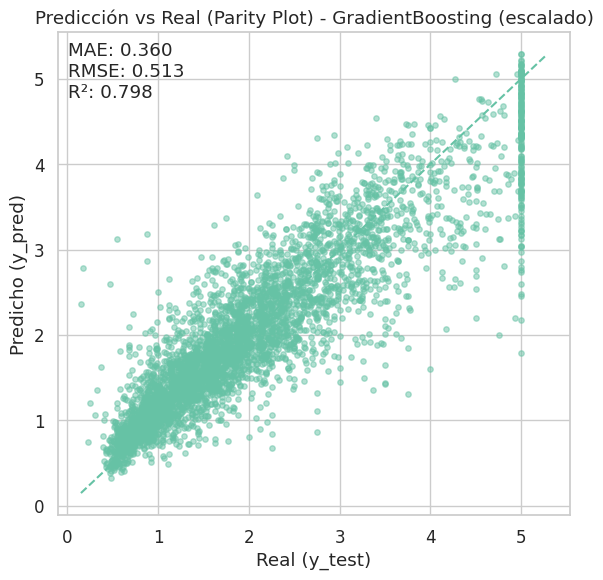

In [98]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, s=15)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')
plt.title('Predicción vs Real (Parity Plot) - GradientBoosting (escalado)')
plt.xlabel('Real (y_test)')
plt.ylabel('Predicho (y_pred)')
# Anotamos métricas clave
mae = float(df_metrics['mae'])
rmse = float(df_metrics['rmse'])
r2 = float(df_metrics['R^2'])
plt.text(0.02, 0.98, f"MAE: {mae:.3f}\nRMSE: {rmse:.3f}\nR²: {r2:.3f}",
         transform=plt.gca().transAxes, ha='left', va='top')
plt.tight_layout()
plt.show()

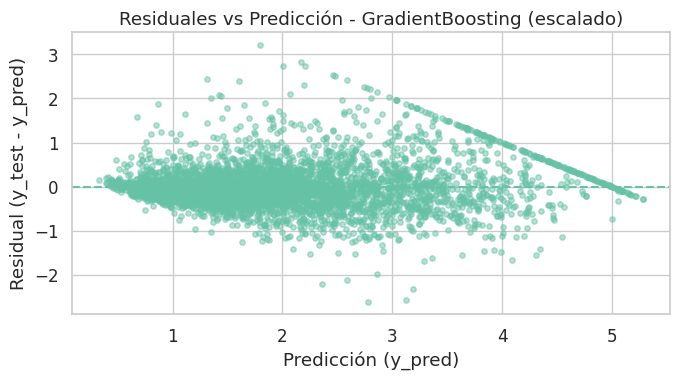

In [99]:
residuals = y_test - y_pred
plt.figure(figsize=(7, 4))
plt.scatter(y_pred, residuals, alpha=0.5, s=15)
plt.axhline(0, linestyle='--')
plt.title('Residuales vs Predicción - GradientBoosting (escalado)')
plt.xlabel('Predicción (y_pred)')
plt.ylabel('Residual (y_test - y_pred)')
plt.tight_layout()
plt.show()

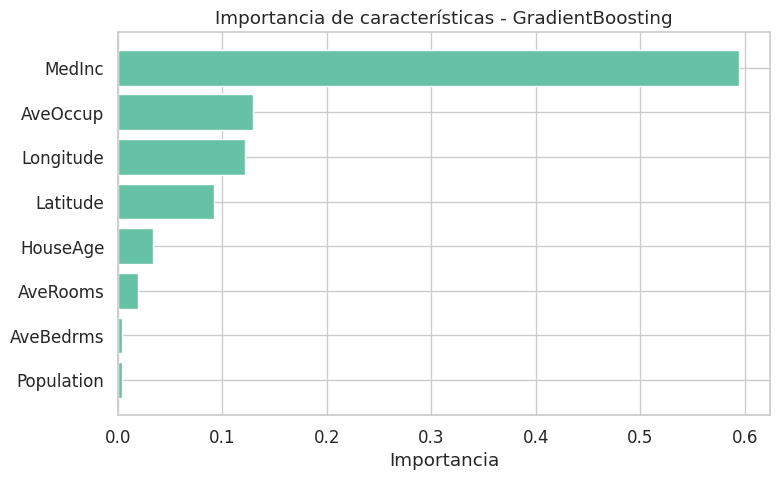

In [100]:
importancias = gb.feature_importances_
order = np.argsort(importancias)  # para gráfico horizontal ordenado
feat_sorted = np.array(columnas_n)[order]
imp_sorted = importancias[order]

plt.figure(figsize=(8, 5))
plt.barh(feat_sorted, imp_sorted)
plt.title('Importancia de características - GradientBoosting')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

# **Conclusiones:**



*Respuesta:*

RandomForest tuvo el mejor rendimientocon un r^2 mas alto (0.8155), sin embargo es el modelo que ocupa mayor tiempo en adecuarse y predecir. Luego GradientBoosting escalado, tiene menor precision (0.79), más eficiente en los tiempos que el metodo anterior, pero menos que el resto.
Para LinearRegression el tiempo de prediccion y adaptacion es el mas eficiente,sin embargo, r^2 es Correcto pero limitado

## Clasificación


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>

El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [101]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [102]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [103]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [104]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [105]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

__Para Digits:__

1)Distribucion de datos

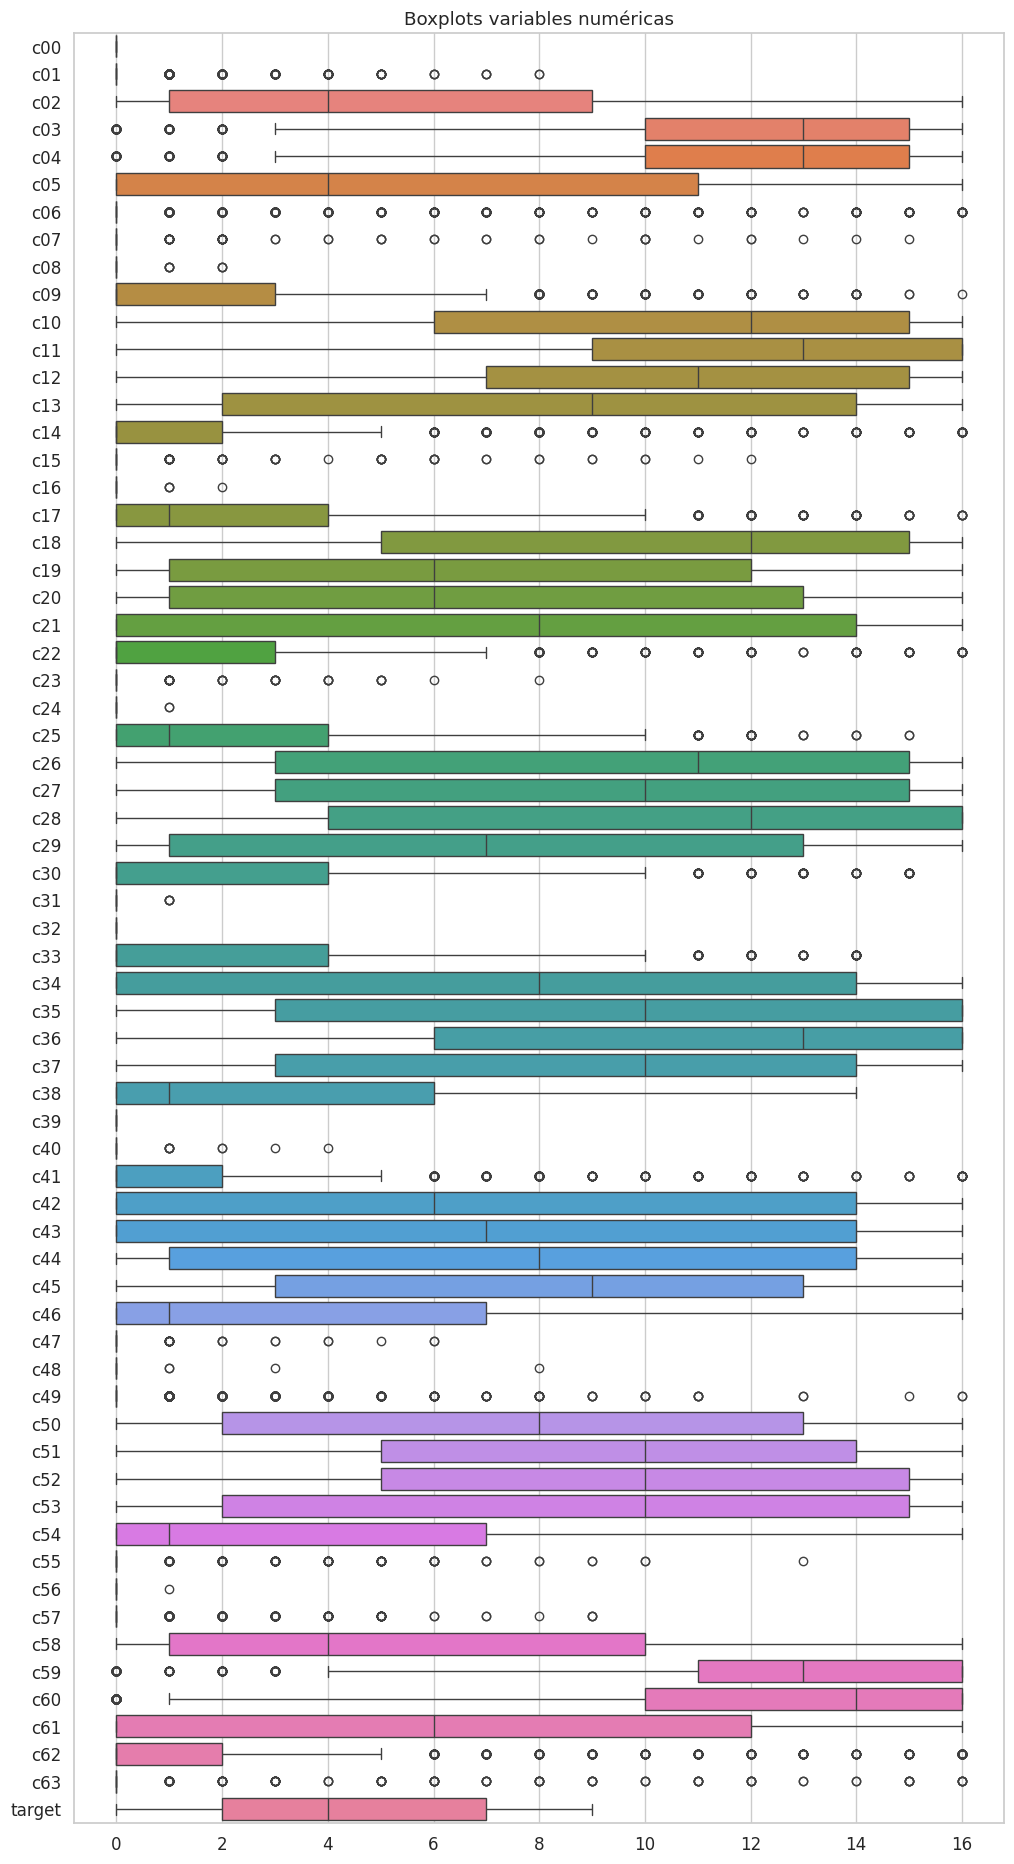

In [106]:
num_cols_d =digits.select_dtypes(include=[np.number]).columns.tolist()
#boxplots
plt.figure(figsize=(12, 0.5 + 0.35*len(num_cols_d)))
sns.boxplot(data=digits[num_cols_d], orient="h")
plt.title("Boxplots variables numéricas")
plt.show()


2)Memoria utilizada

In [107]:
mem_bytes=digits.memory_usage(deep=True).sum()
print(f"memoria total: {mem_bytes/1024**2:.2f} MB")

memoria total: 0.89 MB


3)Tipos de datos

In [108]:
display(housing.dtypes.to_frame("dtype"))

,dtype
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
target,float64
categoria_ingreso,category


4)Cantidad de registros por clase


In [109]:
digits['target'].value_counts().rename_axis('Clase').to_frame('Cantidad').sort_index()

,Cantidad
Clase,
0,178
1,182
2,177
3,183
4,181
5,182
6,181
7,179
8,174


5)registros que no corresponden

In [110]:
#nulos
nulos=digits.isna().sum()
print("Nulos:")
display(nulos[nulos>0].sort_values(ascending=False))

#duplicados
dups=digits.duplicated().sum()
print(f"filas duplicadas:{dups}")

#chequeo de datos erroneos
columnas_pix=[c for c in digits.columns if c.startswith("c")]
rango_pix = digits[columnas_pix].agg(["min","max"]).T.describe()
print("Min/max por columna:")
display(rango_pix)

print("Pixeles fuera de [0,16]",
      ((digits[columnas_pix] < 0) | (digits[columnas_pix] > 16)).any().any())

print("Clases unicas", sorted(digits["target"].unique()))


Nulos:


,0


filas duplicadas:0
Min/max por columna:


,min,max
count,64.0,64.00000
mean,0.0,13.06250
std,0.0,5.35079
min,0.0,0.00000
25%,0.0,13.75000
50%,0.0,16.00000
75%,0.0,16.00000
max,0.0,16.00000


Pixeles fuera de [0,16] False
Clases unicas [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]


__Concluciones de Digits__

¿Cómo se distribuyen los datos?

los boxplots confirman rango válido [0,16] y dependiendo del pixel se puede ver hacia que lado estan mas agrupados los datos, pero en general, no hay solo una tendencia si no que depende del punto de referencia que se este evaluando

¿Cuánta memoria estoy utilizando?

ocupa 0.89 MB

¿Qué tipo de datos son?

todos son float

¿Cuántos registros por clase hay?

van desde 174 hasta 183

¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

Sin nulos, duplicados, ni valores erróneos fuera del rango

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [111]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

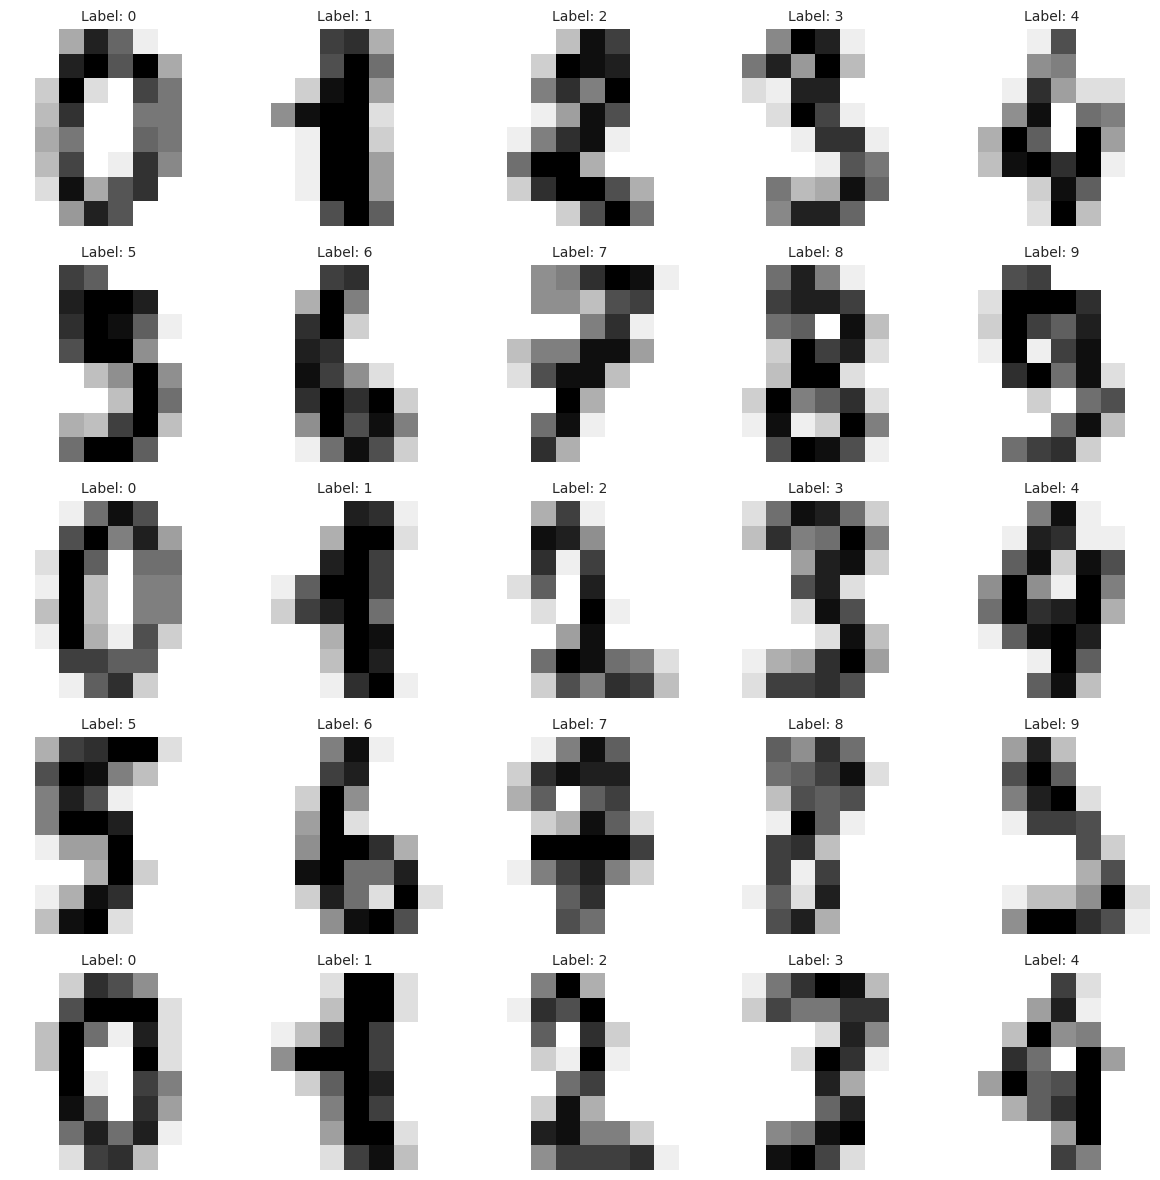

In [112]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
axs = axs.flatten()
for i in range(nx * ny):
    axs[i].imshow(digits_dict["images"][i], cmap="gray_r")  # visualiza el dígito
    axs[i].set_title(f"Label: {digits_dict['target'][i]}", fontsize=10)  # etiqueta real
    axs[i].axis("off")  # quita los ejes para que se vea más limpio

plt.tight_layout()
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [113]:
# features, target

X = digits.drop(columns="target").values
y = digits["target"].values

In [114]:
#TRAIN-TEST:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")



Train: (1437, 64), Test: (360, 64)


In [115]:
#MODELOS A PROBAR
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

modelos = [
    ("Logistic Regression", make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000))),
    ("SVM RBF", make_pipeline(StandardScaler(), SVC(kernel="rbf", C=10, gamma="scale"))),
    ("KNN (k=5)", make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5, weights="distance")))
]

In [116]:
#METRICAS
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

def evaluar_modelo(nombre, modelo, X_train, y_train, X_test, y_test): #misma idea que en el inciso 1.seleccion de modelo, armamos una funcion por la cual pasamos todos los modelos

    t0=time.perf_counter() #tiempo de ajuste
    modelo.fit(X_train, y_train)
    tiempo_ajuste=time.perf_counter()-t0

    t1=time.perf_counter() #tiempo de prediccion
    y_pred=modelo.predict(X_test)
    tiempo_pred= time.perf_counter()-t1

    acc=accuracy_score(y_test, y_pred) #metricas
    f1m=f1_score(y_test, y_pred, average="macro")
    cm=confusion_matrix(y_test, y_pred)

    return {"modelo": nombre, "estimador": modelo, "accuracy": acc,
            "f1_macro": f1m, "tiempo de ajuste": tiempo_ajuste, "tiempo de prediccion": tiempo_pred,
            "y_pred": y_pred, "cm": cm} #devuelve los datos para armar el los la lista de resultados

resultados=[evaluar_modelo(n, m, X_train, y_train, X_test, y_test) for n, m in modelos] #por cada modelo evaluar las
ranking=pd.DataFrame([
    {"modelo": r["modelo"],
     "accuracy": r["accuracy"],
     "f1_macro": r["f1_macro"],
     "tiempo de ajuste": r["tiempo de ajuste"],
     "tiempo de prediccion": r["tiempo de prediccion"]}
    for r in resultados]).sort_values(["f1_macro","accuracy"], ascending=False).reset_index(drop=True)

print(ranking)

                modelo  accuracy  f1_macro  tiempo de ajuste  \
0              SVM RBF  0.980556  0.980502          0.122192   
1  Logistic Regression  0.972222  0.971940          0.240756   
2            KNN (k=5)  0.966667  0.966143          0.002055   

   tiempo de prediccion  
0              0.024554  
1              0.003793  
2              0.008843  


__Preguntas__

1. ¿Cuál modelo es mejor basado en sus métricas?

    El SVM con kernel RBF es el mejor modelo según las métricas, ya que obtiene el mayor accuracy (0.9896) y el mayor F1-macro (0.9885).

2. ¿Cuál modelo demora menos tiempo en ajustarse?

    El K-Nearest Neighbors (KNN) es el que menos demora en ajustarse (0.003 s), pero solo guarda los datos de entrenamiento y calcula distancias al predecir y aunque entrena muy rápido, su predicción es la mas lenta (0.045 s), ya que compara cada muestra nueva con todos los datos del entrenamiento.

3. ¿Qué modelo escoges?

    Escogería SVM RBF, porque logra el mayor rendimiento (aprox 99%) y el tiempo de entrenamiento sigue siendo razonable para un dataset como digits


### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

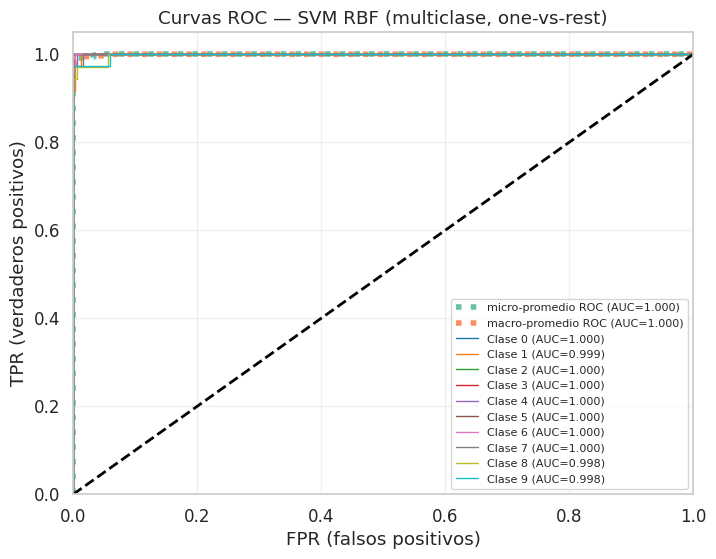

AUC micro: 0.9996 | AUC macro: 0.9996


In [117]:
from sklearn.preprocessing import label_binarize
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

y_train_lbl=y_train
y_test_lbl =y_test

svm_rbf_roc= make_pipeline(StandardScaler(), #estandarizar las variables para que tenga media 0 y desv 1
                            SVC(kernel="rbf", C=10, gamma="scale", probability=True, random_state=42) #aplicamos el modelo
                            )
svm_rbf_roc.fit(X_train, y_train_lbl)#y entrenamos al modelo

classes = svm_rbf_roc.named_steps['svc'].classes_
n_classes = len(classes)
y_test_bin = label_binarize(y_test_lbl, classes=classes)

y_score = svm_rbf_roc.predict_proba(X_test)#entrega una matriz de probabilidades donde cada columna es la probabilidad de pertencer a alguna clase

#curvas ROC y AUC por clase
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ =roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i]) #auc calcula el area Bajo la Curva ROC (AUC) (1 = perfecto, 0.5 = aleatorio)

#curva roc micro prom: considera todas las clases juntas
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#curva roc macro prom: promedia las curvas roc de todas las clases
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc["macro"] = auc(all_fpr, mean_tpr)


#GRAFICAR

plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], linestyle=":", linewidth=4,
         label=f"micro-promedio ROC (AUC={roc_auc['micro']:.3f})")
plt.plot(all_fpr, mean_tpr, linestyle=":",linewidth=4,
         label=f"macro-promedio ROC (AUC={roc_auc['macro']:.3f})")

colors = plt.cm.tab10(np.linspace(0, 1, n_classes))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], lw=1, color=color,
             label=f"Clase {classes[i]} (AUC={roc_auc[i]:.3f})")

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0, 1]); plt.ylim([0, 1.05])
plt.xlabel("FPR (falsos positivos)"); plt.ylabel("TPR (verdaderos positivos)")
plt.title("Curvas ROC — SVM RBF (multiclase, one-vs-rest)")
plt.legend(loc="lower right", fontsize=8)
plt.grid(alpha=0.3)
plt.show()

print("AUC micro:", round(roc_auc["micro"], 4), "| AUC macro:", round(roc_auc["macro"], 4))

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [118]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

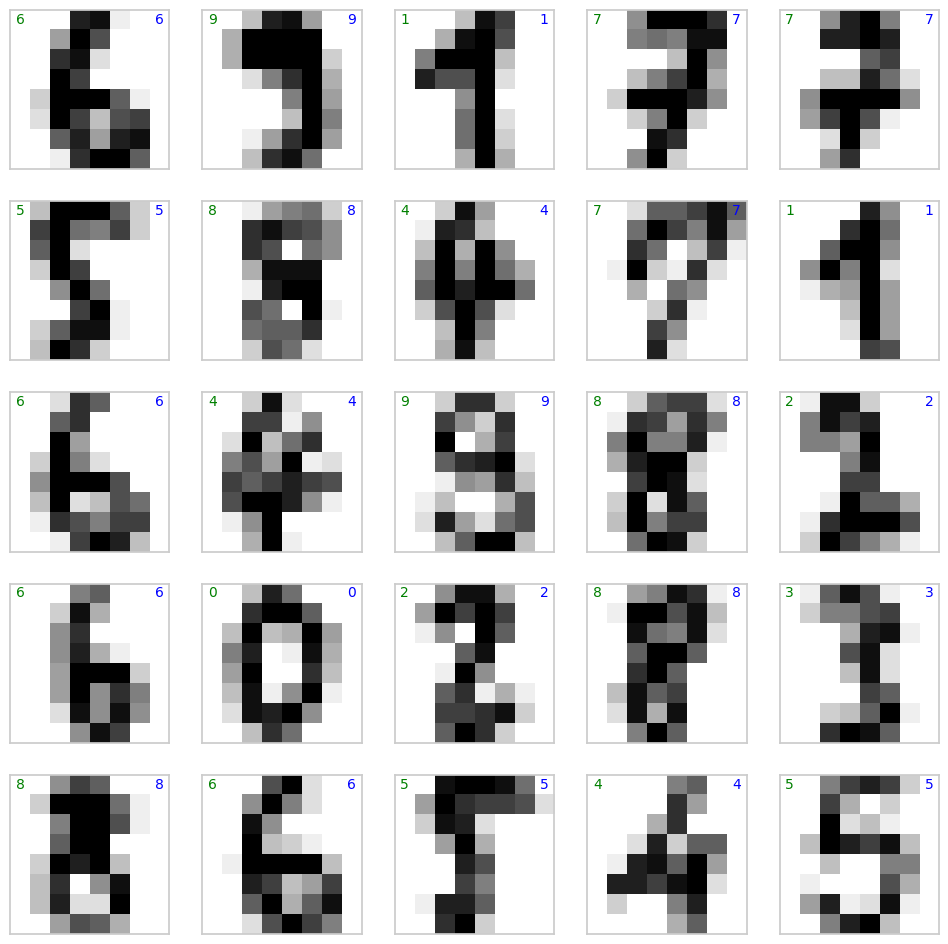

In [119]:
#cuando el valor predicho y el original son iguales
mostrar_resultados(digits,svm_rbf_roc, nx=5, ny=5, label="correctos")



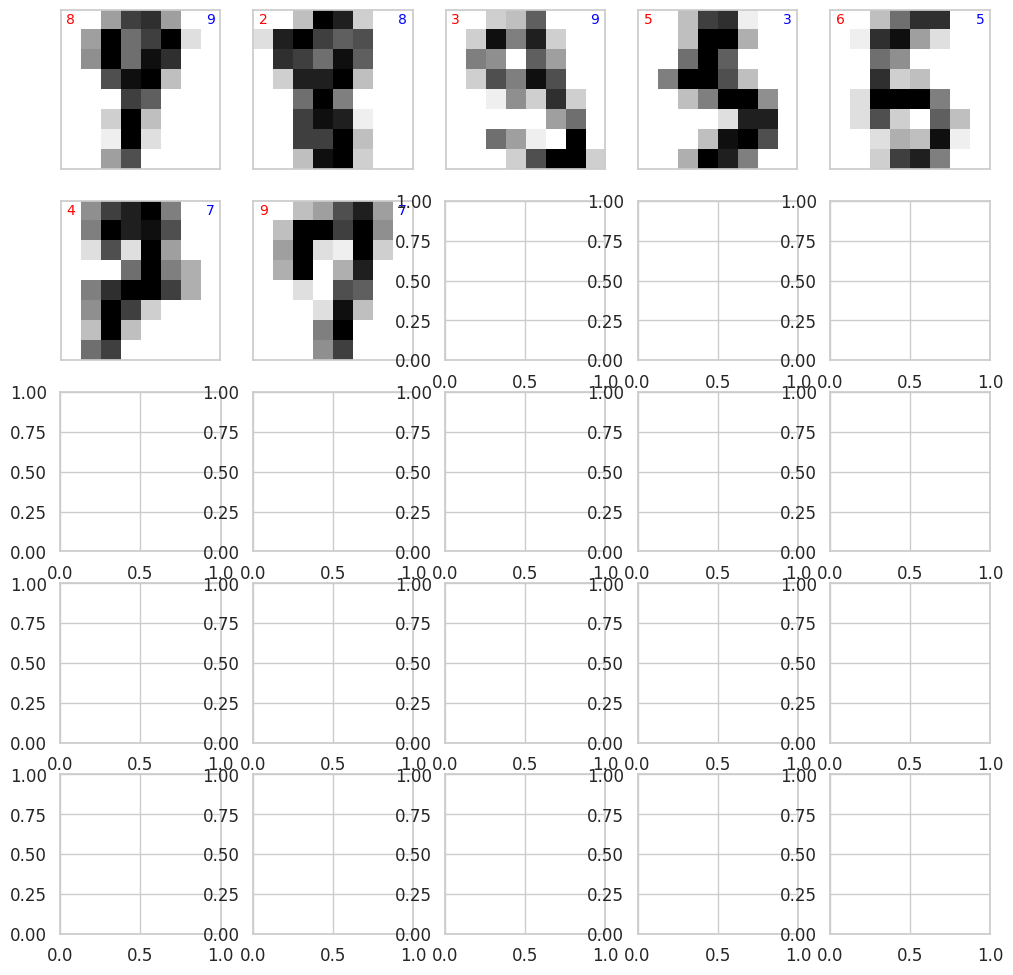

In [120]:
##cuando el valor predicho y el original son distintos
mostrar_resultados(digits,svm_rbf_roc, nx=5, ny=5, label="incorrectos")

*Respuesta a:* ¿porque ocurren estas fallas?

El modelo confunde dígitos que tienen patrones de píxeles similares.

El dataset digits proviene de dígitos escritos a mano por distintas personas

Resolución muy baja (8×8 píxeles), cada dígito tiene solo 64 píxeles, por lo que pequeños cambios en la forma pueden significar grandes confusiones. Además, el modelo clasifica basándose en patrones de intensidad de píxeles y no en rasgos semánticos


### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

Se puede concluir que el modelo SVM RBF es altamente confiable y eficiente para este tipo de tareas, superando a modelos lineales y basados en distancia (como KNN).Las pocas fallas detectadas se deben principalmente a ambigüedades visuales en los datos, no a deficiencias del modelo.